In [117]:
# This file is aimed to add Xe to the model and see if the model can be improved
from src.DataPrepocessing import *
from src.NeuralNets import *
from src.TrainMethod import *

import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Data Propocessing

This part will generate a file with following parts
* Keff
* Power
* Threshold
* Histogramed Cs
* Histogramed Xe

In [118]:
method = '_training'
core_name = 'core' + method
Cs_name = 'Cs' + method
Xe_name = 'Xe' + method
output_name = 'Cs_Xe_shuffle' + method
mode = "CsXe"
shuffle = True

In [119]:
# First, get the keff power and threshold from tracked_results.csv

core_file = pd.read_csv(f"./Raw Data/Add Xe/{core_name}.csv")
core_file.shape

(1400, 10)

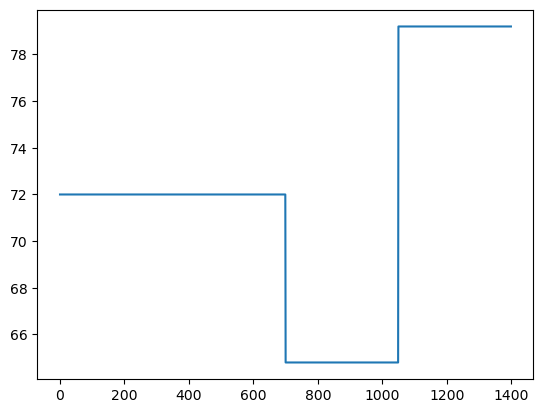

In [120]:
extract_columns = ["keff", "power_normalization_value", "threshold"]
core_data = core_file[extract_columns].to_numpy()
core_data.shape
import matplotlib.pyplot as plt
plt.plot(core_data[:,2])

In [121]:
# get the histogramed version of Cs and Xe

def generate_histogram(data: np.ndarray, binInt = 1.0e-06, binMax = 1.5e-04):
    '''
    Take in a data with columns are features  Transform the features with histogram method
    '''

    # Extract data
    Xvals = data

    nRows, nCols = Xvals.shape

    # define bins
    hEdges = np.arange(0, binMax+binInt, binInt)
    nBins = len(hEdges)-1


    # fill histogram matrix
    nCountsX = np.zeros((nRows, nBins), dtype=np.uint16)
    for n in range(nRows):
        nCountsX[n,:], _ = np.histogram(Xvals[n,:], hEdges)
    return nCountsX

In [122]:
Cs137_file = pd.read_csv(f"./Raw Data/Add Xe/{Cs_name}.csv").to_numpy()
Xe135_file = pd.read_csv(f"./Raw Data/Add Xe/{Xe_name}.csv").to_numpy()


histogramed_Cs137 = generate_histogram(Cs137_file)
histogramed_Xe135 = generate_histogram(Xe135_file)


print(histogramed_Cs137.shape)
print(histogramed_Xe135.shape)

(1400, 150)
(1400, 150)


In [123]:
# do the time align
# although it does not have a clear effect on the result

core_data = core_data[1:]

histogramed_Cs137 = histogramed_Cs137[:-1]
histogramed_Xe135 = histogramed_Xe135[:-1]

print(core_data.shape)
print(histogramed_Cs137.shape)
print(histogramed_Xe135.shape)

(1399, 3)
(1399, 150)
(1399, 150)


In [124]:
if mode == 'CsXe':
    total_data = np.concatenate((core_data, histogramed_Cs137, histogramed_Xe135), axis=1)
if mode == 'Cs':
    total_data = np.concatenate((core_data, histogramed_Cs137), axis=1)
total_data.shape

(1399, 303)

In [125]:
# check if the first column is the keff

total_data[:,0]

array([0.97098439, 0.97657594, 0.97917511, ..., 0.95723952, 0.95741404,
       0.95555552])

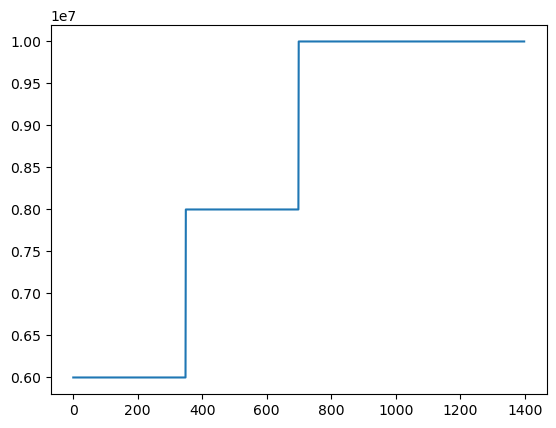

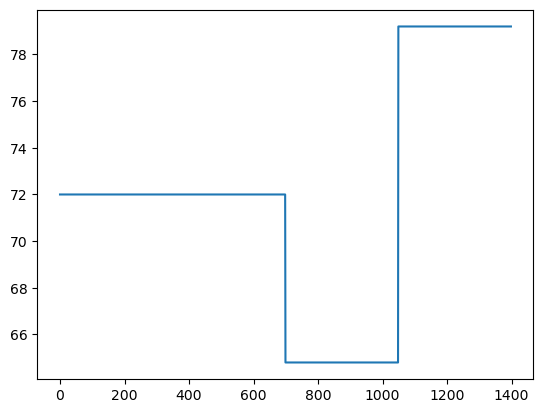

In [126]:
# check the power and threshold

plt.plot(total_data[:,1])
plt.figure()
plt.plot(total_data[:,2])

In [127]:
def shuffle_ndarray(arr, chunk_size=10):
    num_chunks = arr.shape[0] // chunk_size  # 计算块的数量

    # 将数组切片为长度为 chunk_size 的块
    chunks = np.split(arr[:num_chunks*chunk_size], num_chunks)

    # 对块的索引进行洗牌（shuffle）
    shuffled_indices = np.arange(num_chunks)
    np.random.shuffle(shuffled_indices)

    # 根据洗牌后的索引重新排序块
    shuffled_chunks = [chunks[i] for i in shuffled_indices]

    # 将洗牌后的块重新合并为一个数组
    shuffled_arr = np.concatenate(shuffled_chunks)

    return shuffled_arr


if shuffle:

    total_data = shuffle_ndarray(total_data, 50)

In [128]:
# Drop the data 

# Save the array as a CSV file
np.savetxt(f'./Processed Data/{output_name}.csv', total_data, delimiter=',')